# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [31]:
data.duplicated().sum()

0

In [34]:
data = data.drop_duplicates()


       children  days_employed  dob_years education  education_id  \
0             1    8437.673028         42    высшее             0   
1             1    4024.803754         36   среднее             1   
2             0    5623.422610         33   среднее             1   
3             3    4124.747207         32   среднее             1   
4             0  340266.072047         53   среднее             1   
...         ...            ...        ...       ...           ...   
21520         1    4529.316663         43   среднее             1   
21521         0  343937.404131         67   среднее             1   
21522         1    2113.346888         38   среднее             1   
21523         3    3112.481705         38   среднее             1   
21524         2    1984.507589         40   среднее             1   

          family_status  family_status_id gender income_type  debt  \
0       женат / замужем                 0      F   сотрудник     0   
1       женат / замужем        

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

data.sort_values(by='debt', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
18703,0,1181.985939,33,начальное,3,женат / замужем,0,F,компаньон,1,78892,операции со своей недвижимостью,C,операции с недвижимостью
14774,0,1149.701833,54,среднее,1,женат / замужем,0,F,сотрудник,1,69310,операции с жильем,C,операции с недвижимостью
9515,0,354932.869424,67,высшее,0,женат / замужем,0,F,пенсионер,1,196337,заняться высшим образованием,C,получение образования
17167,1,368.115155,38,среднее,1,Не женат / не замужем,4,M,сотрудник,1,186546,операции с недвижимостью,C,операции с недвижимостью
12687,1,1557.031170,24,высшее,0,Не женат / не замужем,4,F,сотрудник,1,87681,строительство жилой недвижимости,C,операции с недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7412,0,10080.031918,44,среднее,1,гражданский брак,1,F,сотрудник,0,112449,на проведение свадьбы,C,проведение свадьбы
7411,0,363331.435399,55,высшее,0,гражданский брак,1,F,пенсионер,0,73139,на проведение свадьбы,C,проведение свадьбы
7410,1,417.149043,30,высшее,0,гражданский брак,1,F,сотрудник,0,214514,жилье,B,операции с недвижимостью
7409,0,10071.500123,58,начальное,3,женат / замужем,0,M,госслужащий,0,53099,заняться высшим образованием,C,получение образования


### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

<AxesSubplot:xlabel='children', ylabel='mean'>

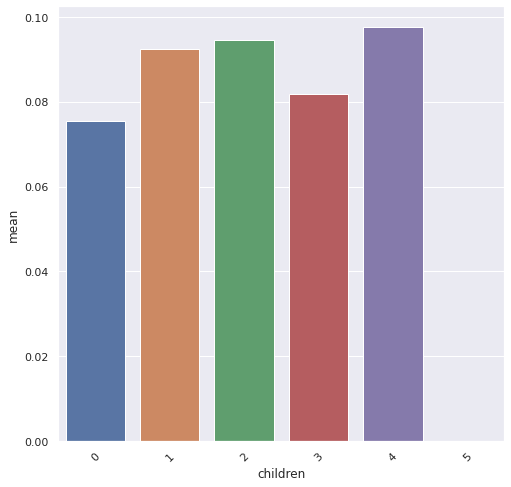

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data_1 = data.groupby('children')['debt'].agg(['mean']).reset_index()# Ваш код будет здесь. Вы можете создавать новые ячейки.
plt.figure(figsize = (8, 8))
plt.xticks(rotation=45)
sns.barplot(data = data_1, x = 'children', y= 'mean')


In [24]:
data_1

,children,mean
0,0,0.075438
1,1,0.092346
2,2,0.094542
3,3,0.081818
4,4,0.097561
5,5,0.000000


**Вывод:** 
Клиенты у которых нету детей вероятность возврата кредита в срок больше всего, этому соответствует средняя величина задолжностей. Людей с 1, 2 и 4 детьми ленейно увеличивается(хоть и людей и с 4 людьми не много) все же есть зависимость. Людей с 3 детьми это не касается и их так же не много, нужно выдвинуть гипотезу и также проверить и выстроить зависимость от других параметров. Людей с 5 детьми всего лишь 9 человек и можно не брать в расчет т.к. их слишком мало. Самое главное хотелось бы сказать: Хоть разница в этих значениях небольшая, возможно, разница между 7,5% и 9,7% не ощущается как большая.  В реальности же у банка значительно больше заемщиков, и даже вроде бы незначительное улучшение скоринговой системы дает хороший прирост доходов. В финансовой сфере часто даже долли процентов означают миллионную прибыль или убыток для банка.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
data_2 = data.groupby('family_status')['debt'].agg(['mean','count']).reset_index()# Ваш код будет здесь. Вы можете создавать новые ячейки.
data_2

,family_status,mean,count
0,Не женат / не замужем,0.097639,2796
1,в разводе,0.070648,1189
2,вдовец / вдова,0.066246,951
3,гражданский брак,0.093130,4134
4,женат / замужем,0.075606,12261


<AxesSubplot:xlabel='family_status', ylabel='mean'>

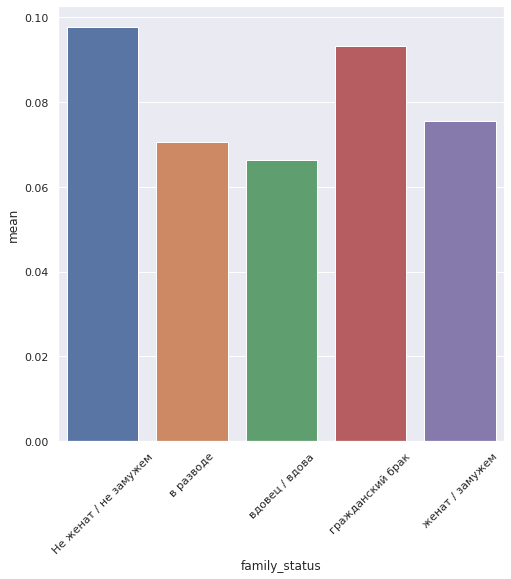

In [26]:
plt.figure(figsize = (8, 8))
plt.xticks(rotation=45)
sns.barplot(data = data_2, x = 'family_status', y = 'mean')


**Вывод:** 
Считаю, что Не женатым / не замужним, сложней выплачивать кредит одному и видна разница. Женатым / замужним легче выплачивать кредит т.к. есть кредитное плечо и супруг может помочь закрыть кредит и все таки двоим легче закрыть кредит чем одному. Людям в разводе и вдовец / вдова видна зависимость, что им легче всего закрывать кредит. Мысли на этот счет, что люди этих двух категории более стабильные и уже имеют подушку безопасности, что нельзя сказать о людях с гражданским браком.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [27]:
data_3 = data.groupby('total_income_category')['debt'].agg(['mean','count']).reset_index()# Ваш код будет здесь. Вы можете создавать новые ячейки.
data_3

,total_income_category,mean,count
0,A,0.080000,25
1,B,0.070602,5014
2,C,0.084982,15921
3,D,0.060172,349
4,E,0.090909,22


<AxesSubplot:xlabel='total_income_category', ylabel='mean'>

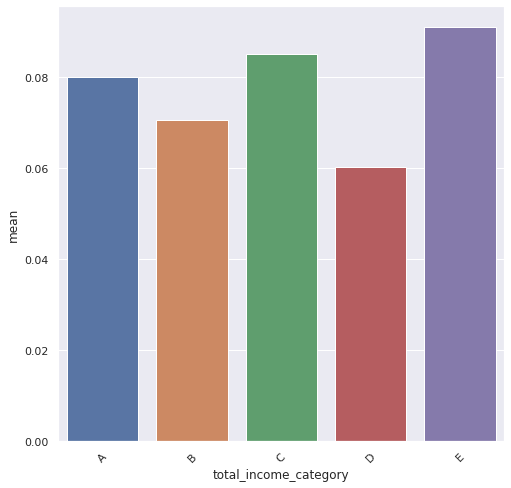

In [28]:
plt.figure(figsize = (8, 8))
plt.xticks(rotation=45)
sns.barplot(data = data_3, x = 'total_income_category', y = 'mean')

**Вывод:** 
Взяв людей из категории Е можно сказать что у них меньше всего вероятности закрывать кредит в срок связано с более низкой зарплатой но опять таки их и меньше всего. Категория Е не может себе позволить не брать кредит, их слишком мало. Самые стабильные люди из категории D(приемлемое количество людей) и В так как у них вероятность закрыть кредит больше всего.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [29]:
data_4 = data.groupby('purpose_category')['debt'].agg(['mean','count']).reset_index()# Ваш код будет здесь. Вы можете создавать новые ячейки.
data_4

,purpose_category,mean,count
0,операции с автомобилем,0.093480,4279
1,операции с недвижимостью,0.072551,10751
2,получение образования,0.092528,3988
3,проведение свадьбы,0.079118,2313


<AxesSubplot:xlabel='purpose_category', ylabel='mean'>

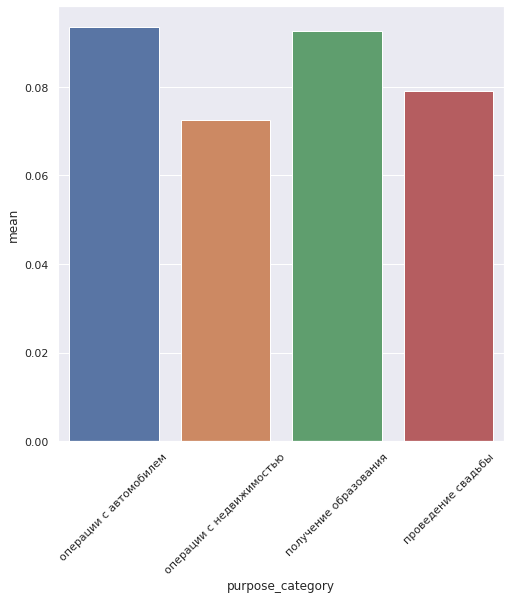

In [30]:
plt.figure(figsize = (8, 8))
plt.xticks(rotation=45)
sns.barplot(data = data_4, x = 'purpose_category', y = 'mean')

**Вывод:** 
Самые платежоспособные люди которые брали кредит на недвижимость, более ответственная покупка и есть возможность потерять недвижимость и поэтому оплачивают во время. Что нелььзя сказать о кредите на покупку автомобиля и на получения образования(меньше всего вероятность оплатить кредит).

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Это связано по двум причинам 1) по технологическим причинам 2) и вызванные человеческим фактором

Самой вероятной причиной в нашем случае я считаю, что эти ошибки вызваны человеческим фактором. Люди ошибаются и делают это постоянно. Дайте человеку возможность ввести данные, и он обязательно даст промашку: опечатается в тексте, укажет другой порядок величин, перепутает числа или категориальные значения.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*
Медиана самая информативная мера центральной тенденции для искаженных распределений или распределений с выбросами. Например, медиана часто используется в качестве меры центральной тенденции для распределения доходов, которое, как правило, сильно искажено.

### Шаг 4: общий вывод.

Напишите ваш общий вывод.
Во первых хочу пройтись по тому, что цель кредита очень важна и, что люди берущие кредит на недвижимость самые рентабильные. Люди берущие кредит на образование и авто, у них этот показатель ниже. 
Во вторых уровень дохода так же очень важень, тут самые оправдывающие люди с достатком чють выше и ниже среднего(В и D, нужны дополнительные иследования для того что бы понять с чем жто связанно)
В тертьих считаю, что Не женатым / не замужним, сложней выплачивать кредит одному и видна разница. Женатым / замужним легче выплачивать кредит т.к. есть кредитное плечо и супруг может помочь закрыть кредит и все таки двоим легче закрыть кредит чем одному. 
И последний пункт, клиенты у которых нету детей вероятность возврата кредита в срок больше всего, этому соответствует средняя величина задолжностей при наибольшем количестве.

Банк очен редко опирается только на один показать, что бы построить общюю картину. В целом можно сказать, это MVP (минимально жизнеспособный продукт), и что тут было бы неплохо проделать более широкое исследование. Например посмотреть как влияет сочетание двух факторов (например доходов и кол-во детей одновременно).